In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select only numerical columns to scale
numerical_features = ["Amount", "Time"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows after scaling
print(df.head())


       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

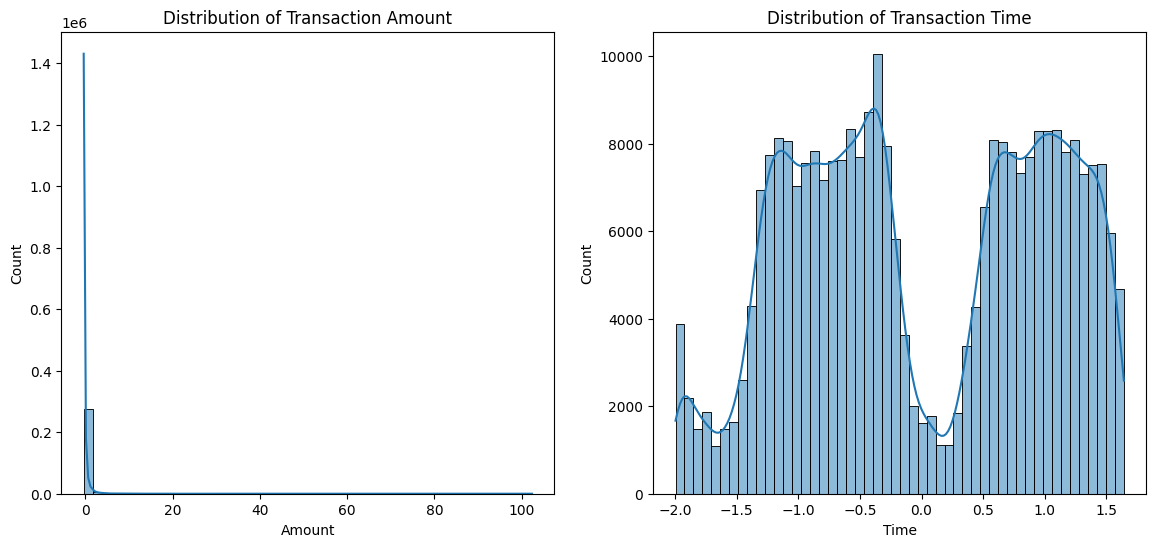

In [ ]:
# Plot histograms for 'Amount' and 'Time'
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Amount'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount')

sns.histplot(df['Time'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Transaction Time')

plt.show()


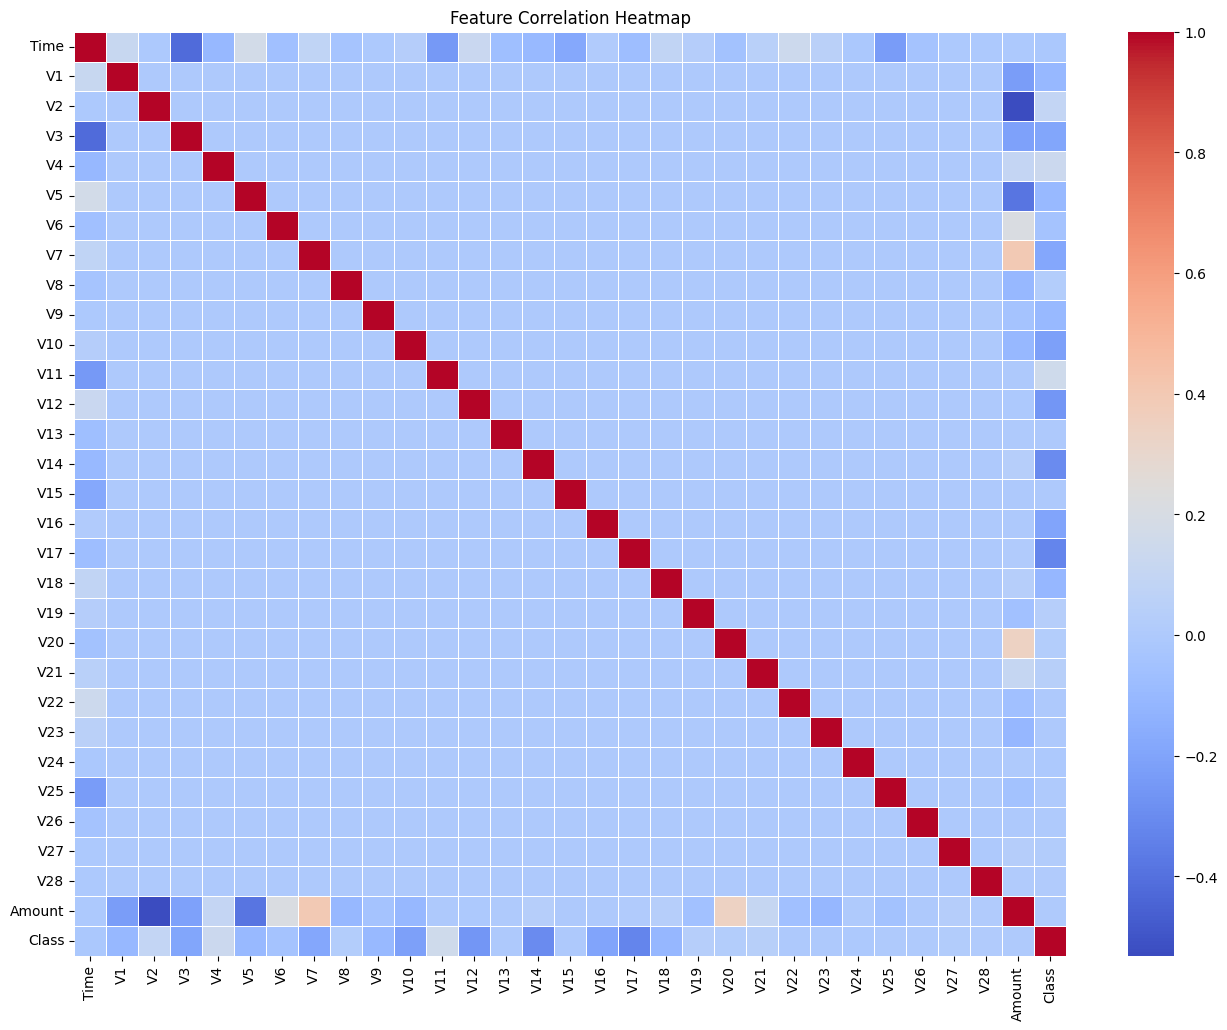

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


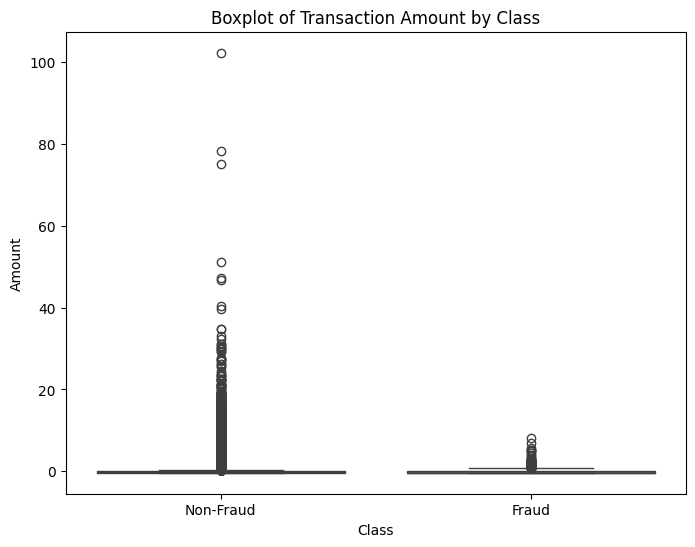

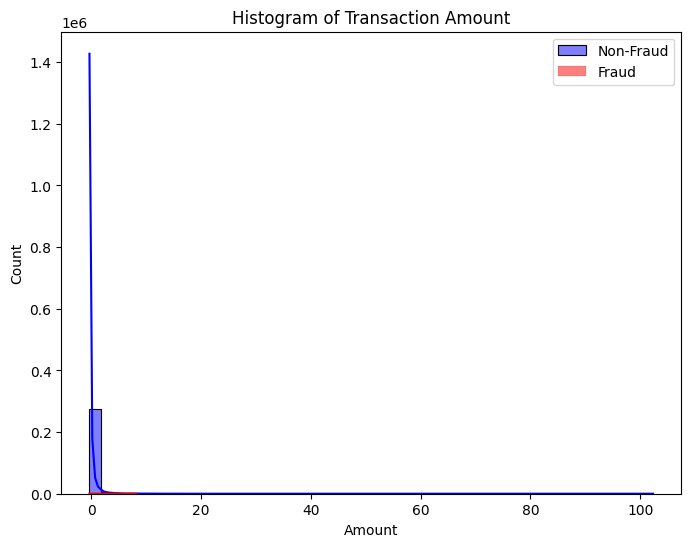

In [ ]:
# Separate fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Plot boxplots for 'Amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Class'], y=df['Amount'])
plt.title("Boxplot of Transaction Amount by Class")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()

# Plot histogram for 'Amount'
plt.figure(figsize=(8, 6))
sns.histplot(non_fraud['Amount'], bins=50, kde=True, color="blue", label="Non-Fraud")
sns.histplot(fraud['Amount'], bins=50, kde=True, color="red", label="Fraud")
plt.legend()
plt.title("Histogram of Transaction Amount")
plt.show()


In [ ]:
fraud_percentage = (df['Class'].sum() / len(df)) * 100
print(f"Fraud Percentage in Dataset: {fraud_percentage:.4f}%")


Fraud Percentage in Dataset: 0.1727%


In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to remove:", high_corr_features)

# Drop these features
df_selected = df.drop(columns=high_corr_features)


Highly correlated features to remove: []


In [ ]:
df_selected

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


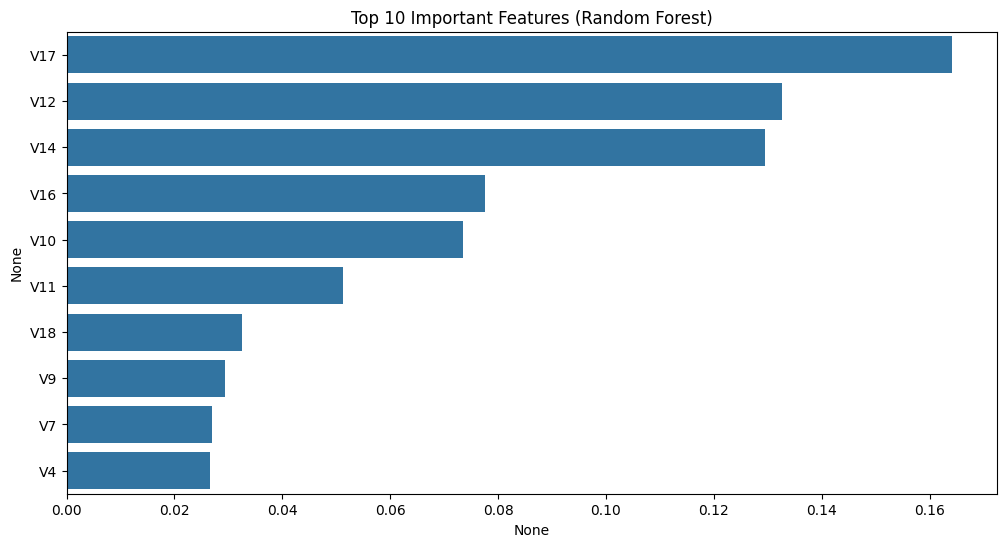

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target (excluding 'Class')
X = df_selected.drop(columns=["Class"])
y = df_selected["Class"]

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance[:10].index)
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


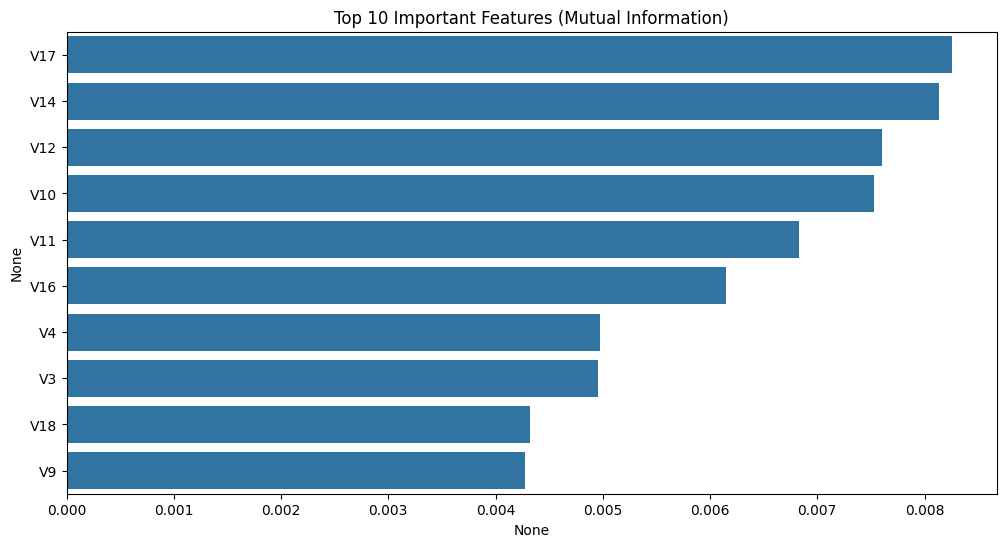

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Plot Top 10 Features
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_series[:10], y=mi_series[:10].index)
plt.title("Top 10 Important Features (Mutual Information)")
plt.show()


In [ ]:
# Select top 10 features from Mutual Information and Random Forest
top_features = set(feature_importance[:10].index) | set(mi_series[:10].index)

print("Final selected features:", top_features)

# Keep only these features for modeling
df_final = df_selected[list(top_features) + ["Class"]]


Final selected features: {'V3', 'V12', 'V10', 'V14', 'V9', 'V11', 'V7', 'V16', 'V17', 'V4', 'V18'}


In [ ]:
!pip install imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/238.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/238.4 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/238.4 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/238.4 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/238.4 kB 325.1 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/238.4 kB 325.1 kB/s eta 0:00:01
   ------ --------


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Run The different models:       